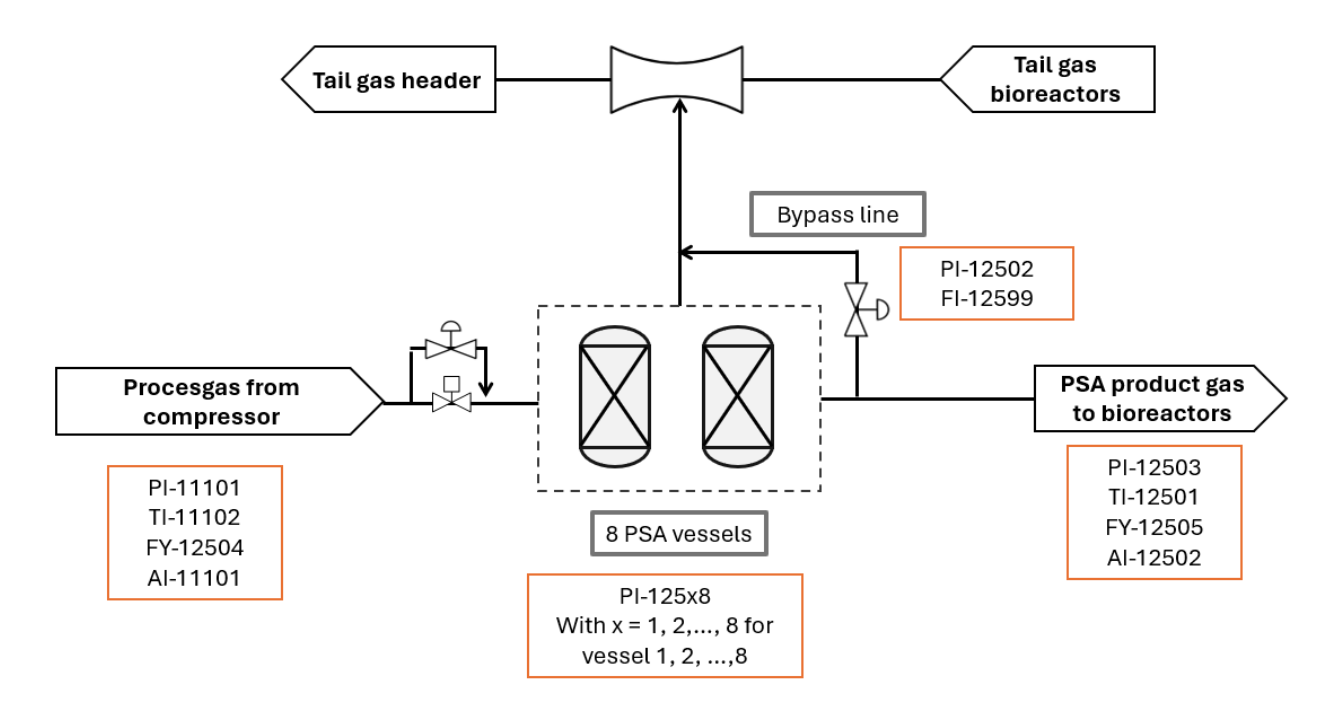

# Geometry Data

In [1]:
import numpy as np
# --- NÚMEROS CON TUS DATOS ---
D = 3.8
A = np.pi * (D/2)**2
m_full_water_kg = 95600
m_empty_kg = 26490
h_bed = 4.83  
void_fraction=0.4

Volume = (m_full_water_kg - m_empty_kg)/1000                  # 69.11 m3
h_all= Volume / A                                                 # 6.09

Vg=(h_all-h_bed)*A+h_bed*A*void_fraction 


# Read Instrumental Data

In [2]:
import os,sys
ruta_libs = os.path.abspath("libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
    
from helpLibs import *

DATA_PATH = r"C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\psa_data.csv"   # <-- AJUSTA ESTO

t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 23:59:59"   

df, meta = getPSAdata(DATA_PATH, start=t0,end=t1)
flows = compute_flows(df,volumes_m3 = Vg)

# Plot Raw Data

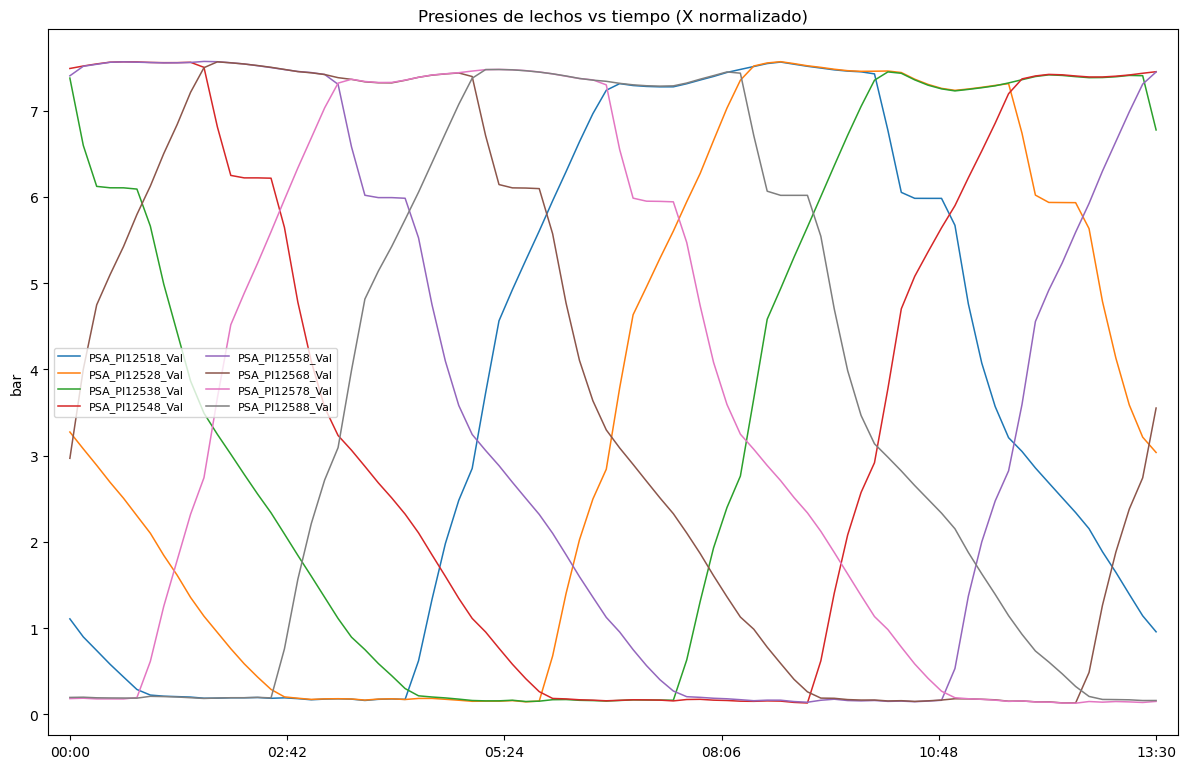

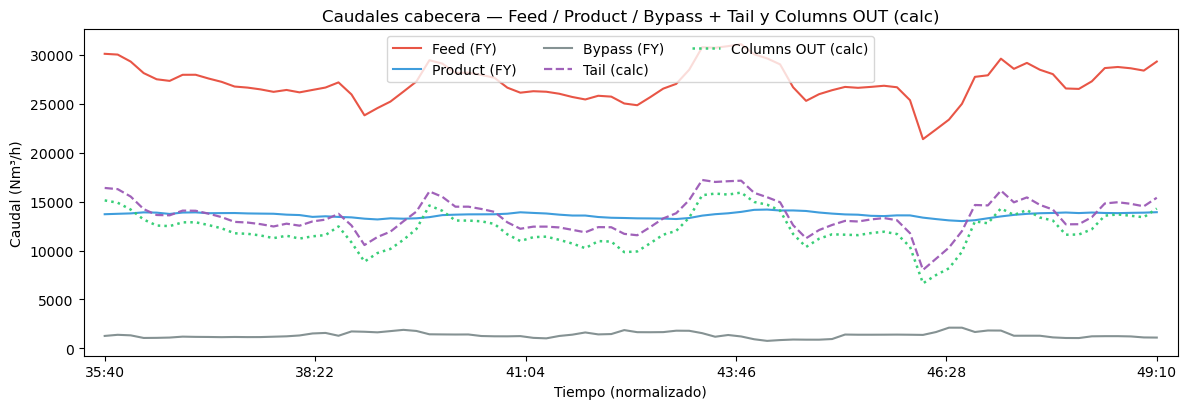

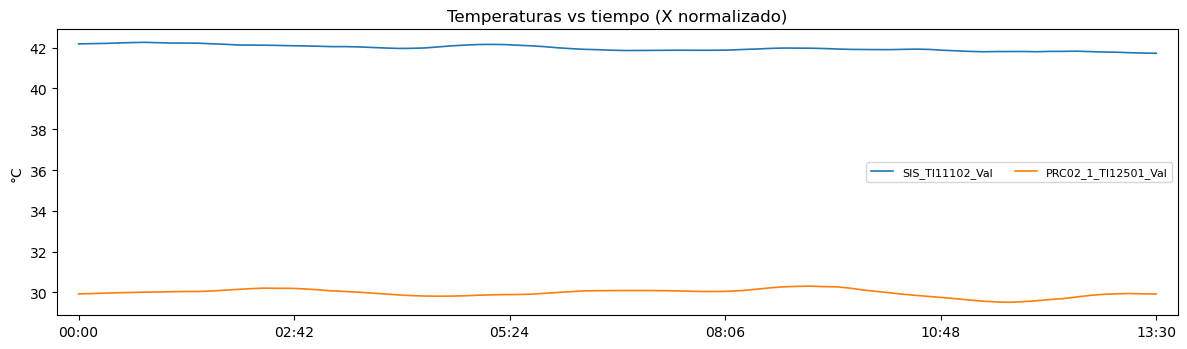

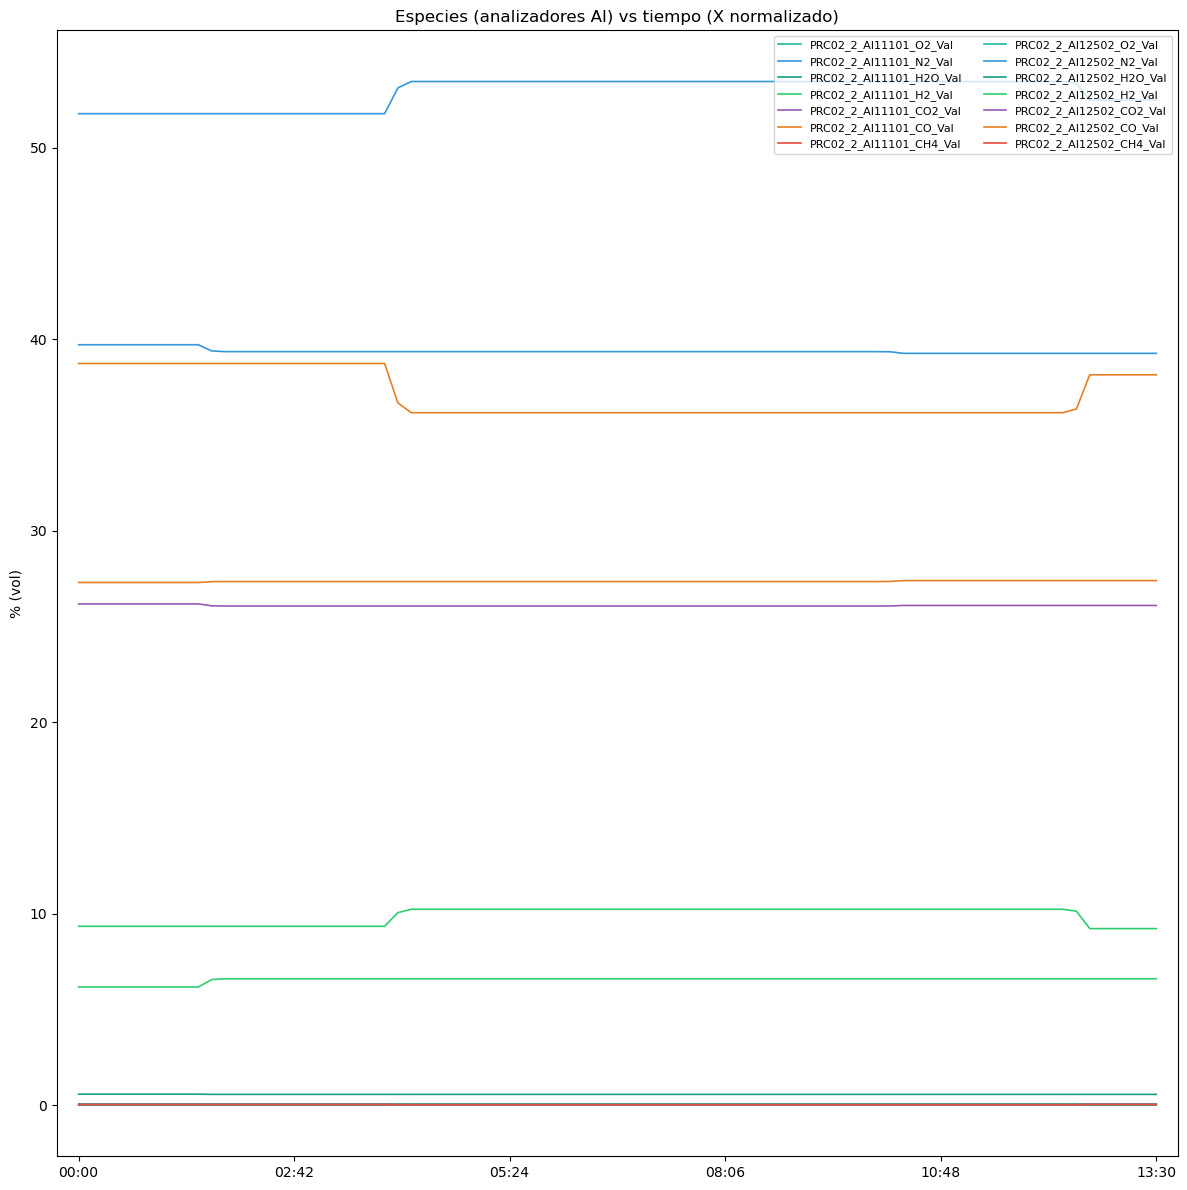

In [3]:
t0 = "2025-04-20 00:35:40"
t1 = "2025-04-20 00:49:18"
plot_raw_pressure(df, start=t0, end=t1)
plot_raw_flows(df, start=t0, end=t1)
plot_raw_temperature(df, start=t0, end=t1)
plot_raw_species(df, start=t0, end=t1)

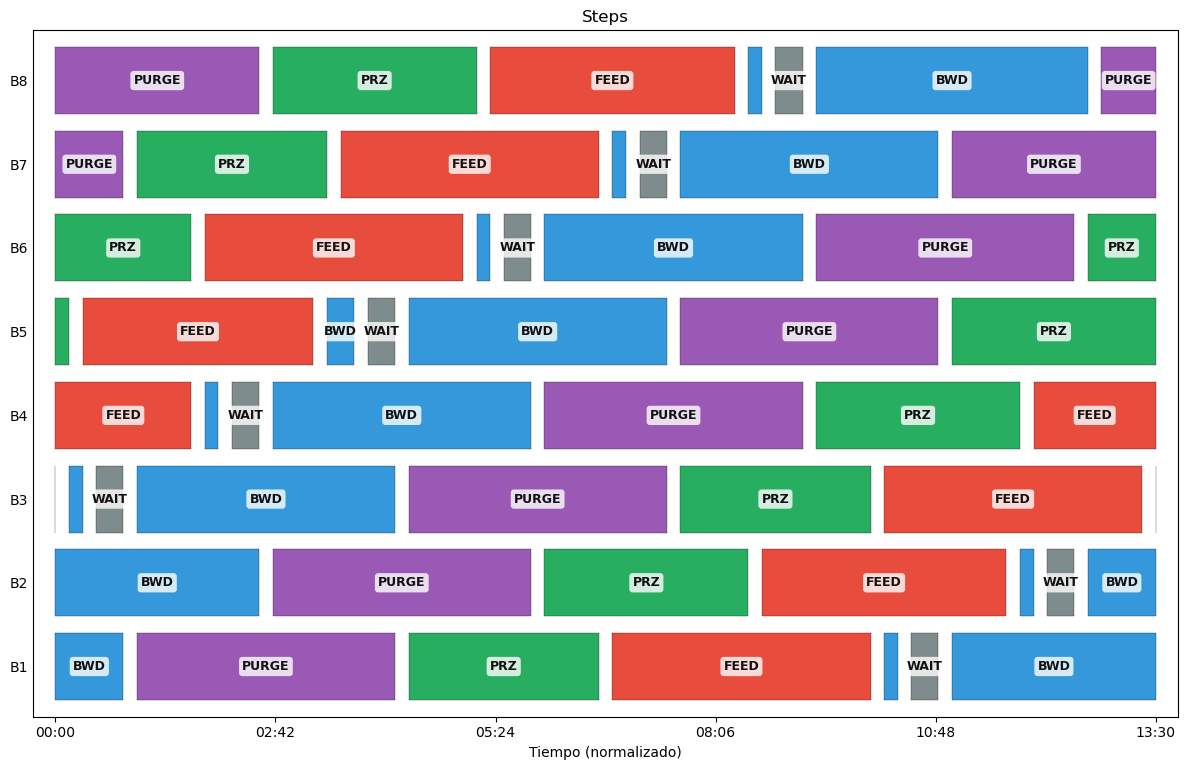

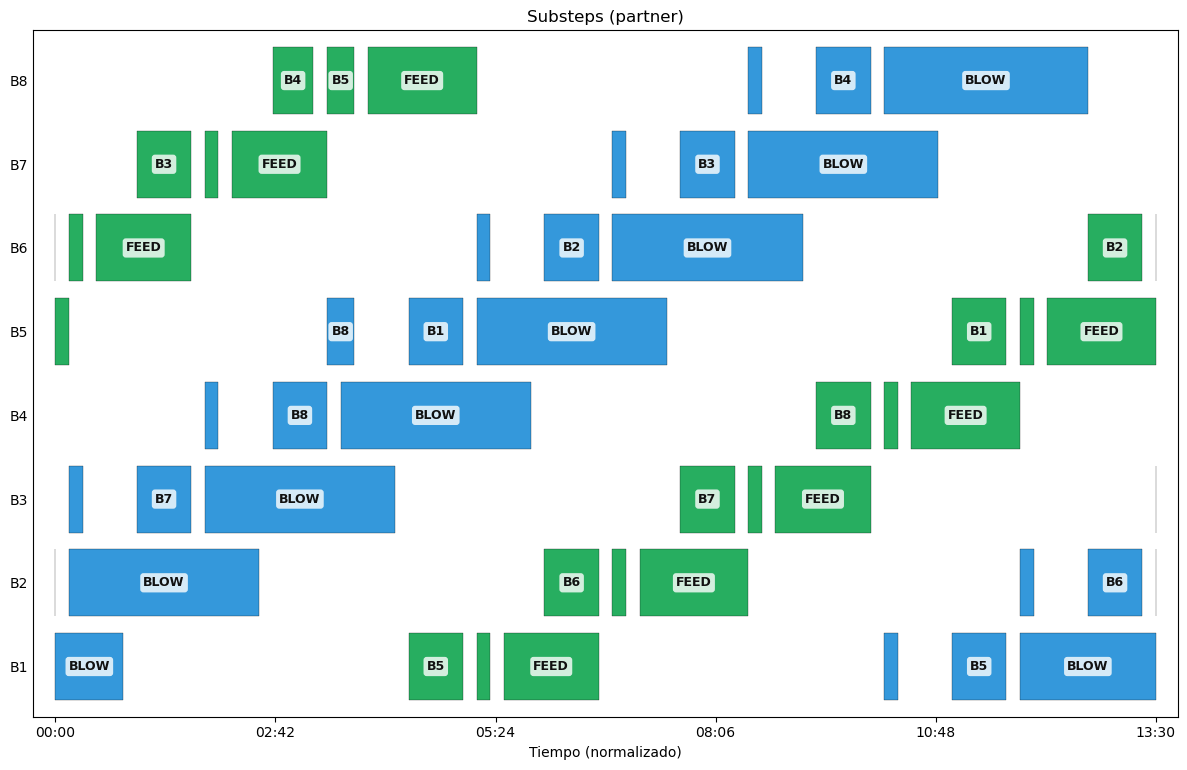

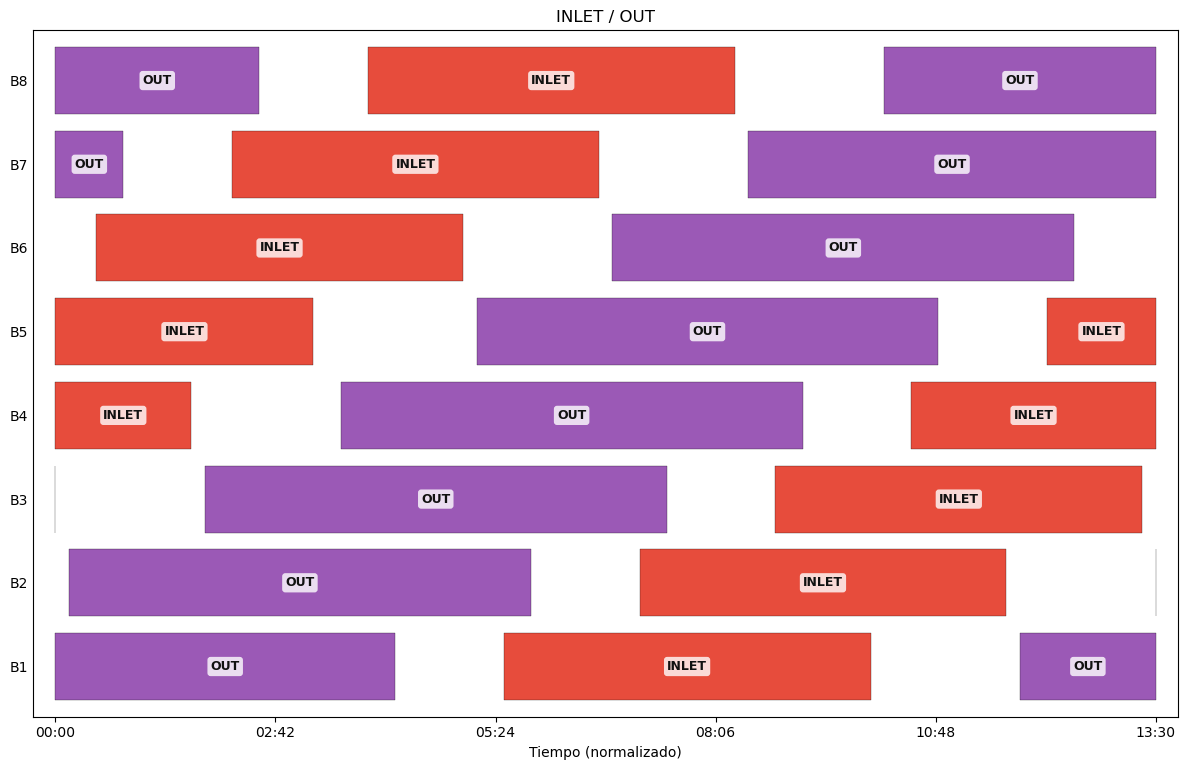

In [4]:
plot_steps_gantt(df, start=t0, end=t1, mode="steps")
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
plot_steps_gantt(df, start=t0, end=t1, mode="inout")

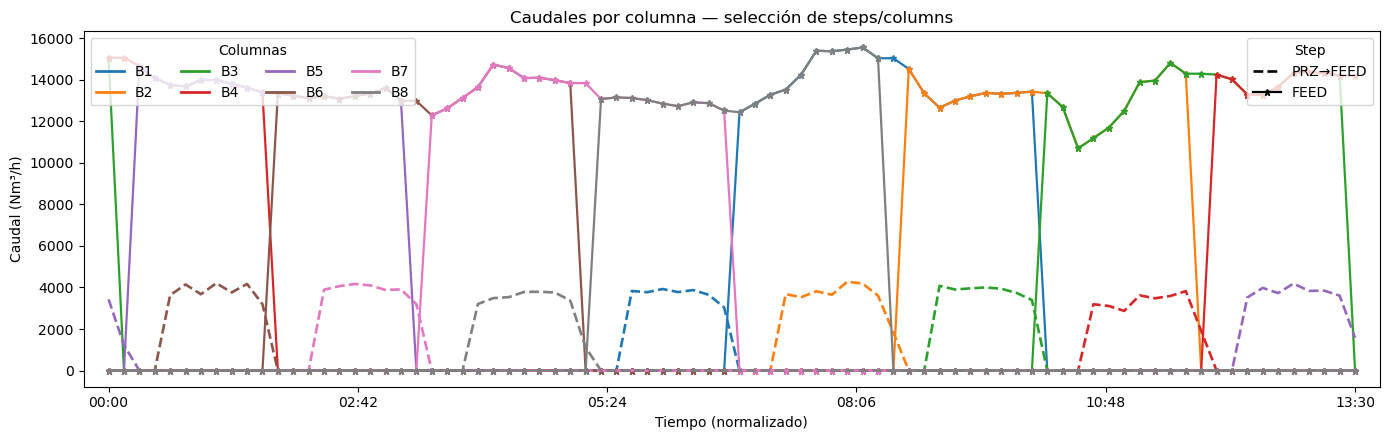

In [5]:
plot_flows(
    df, flows,
    start=t0, end=t1,
    beds="all",
    steps=["feed","prz-feed"],
    units="Nm3_h",
    figsize=(14, 4.5),    
)

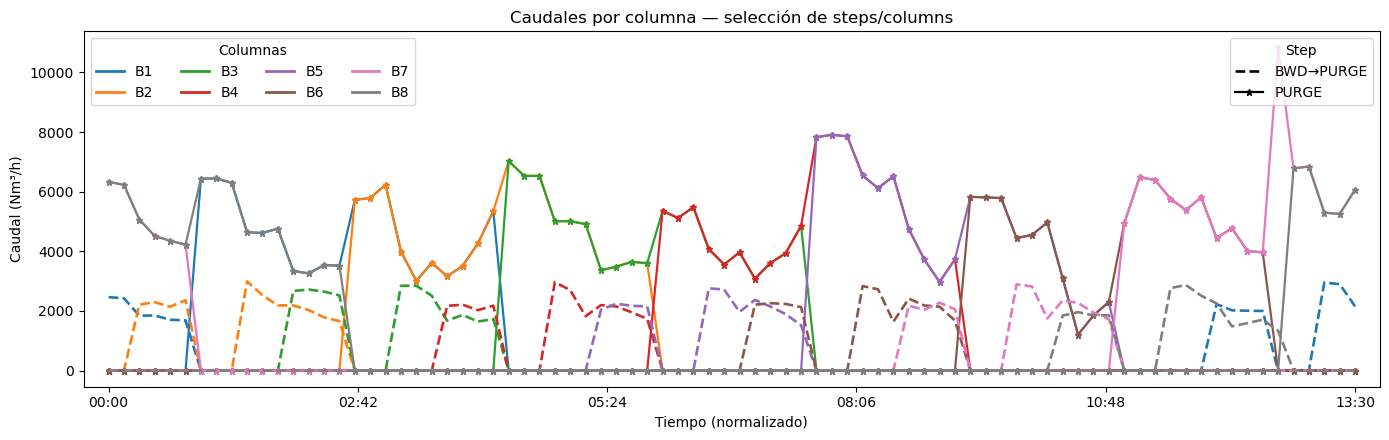

In [6]:
plot_flows(
    df, flows,
    start=t0, end=t1,
    beds="all",
    steps=["purge","bwd-purge"],
    units="Nm3_h",
    figsize=(14, 4.5),    
)

In [2]:
import os,sys
ruta_libs = os.path.abspath("libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
    
from helpLibs import *

DATA_PATH = r"C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\psa_data.csv"   # <-- AJUSTA ESTO

t0 = "2025-04-20 00:00:01"   
t1 = "2025-06-20 23:59:59"   

df, meta = getPSAdata(DATA_PATH, start=t0,end=t1)
flows = compute_flows(df,volumes_m3 = Vg)

KeyboardInterrupt: 

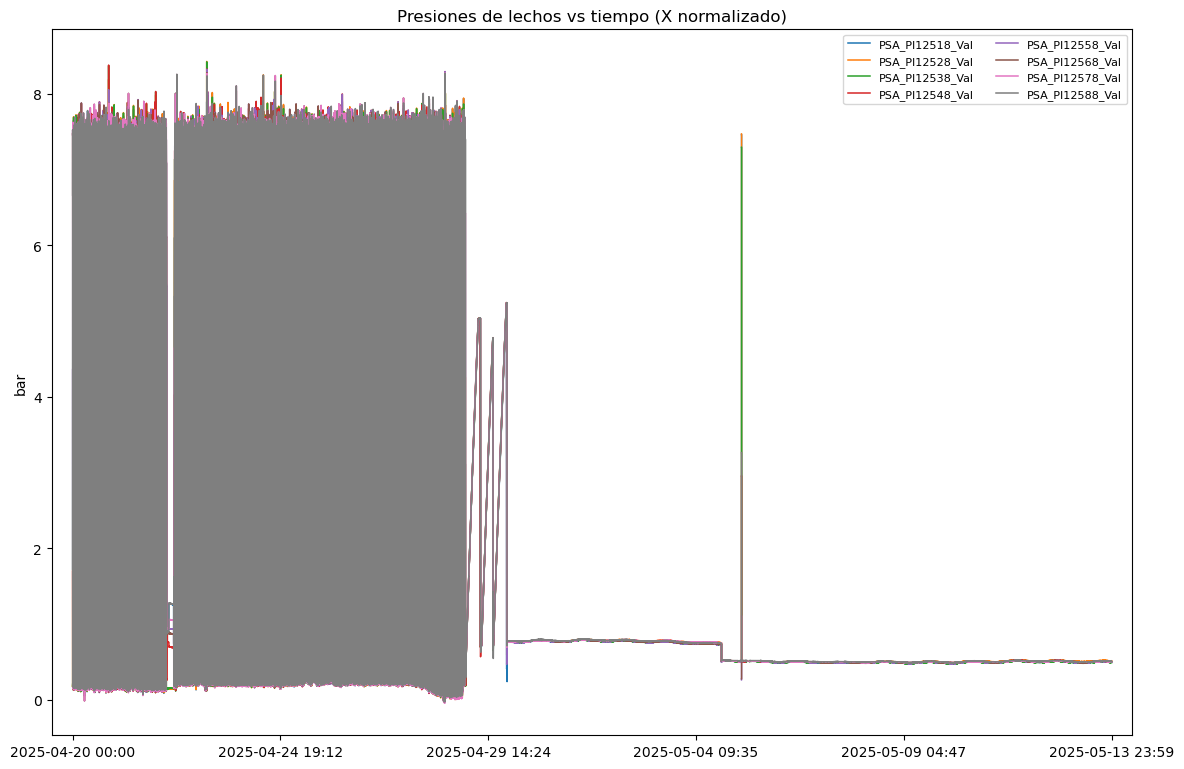

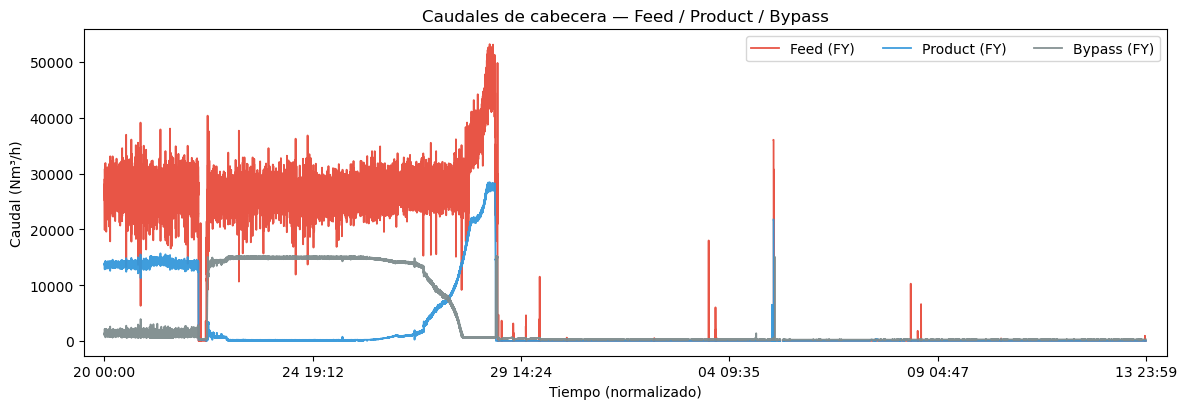

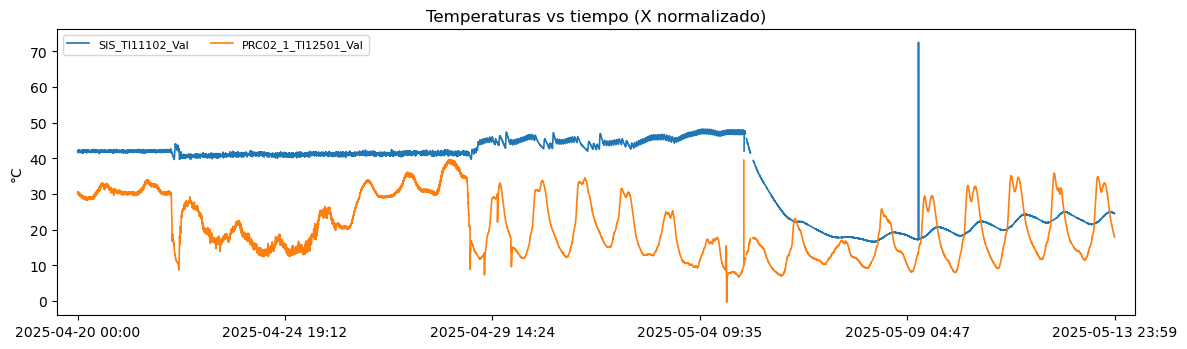

C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\libs\helpLibs.py:634: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


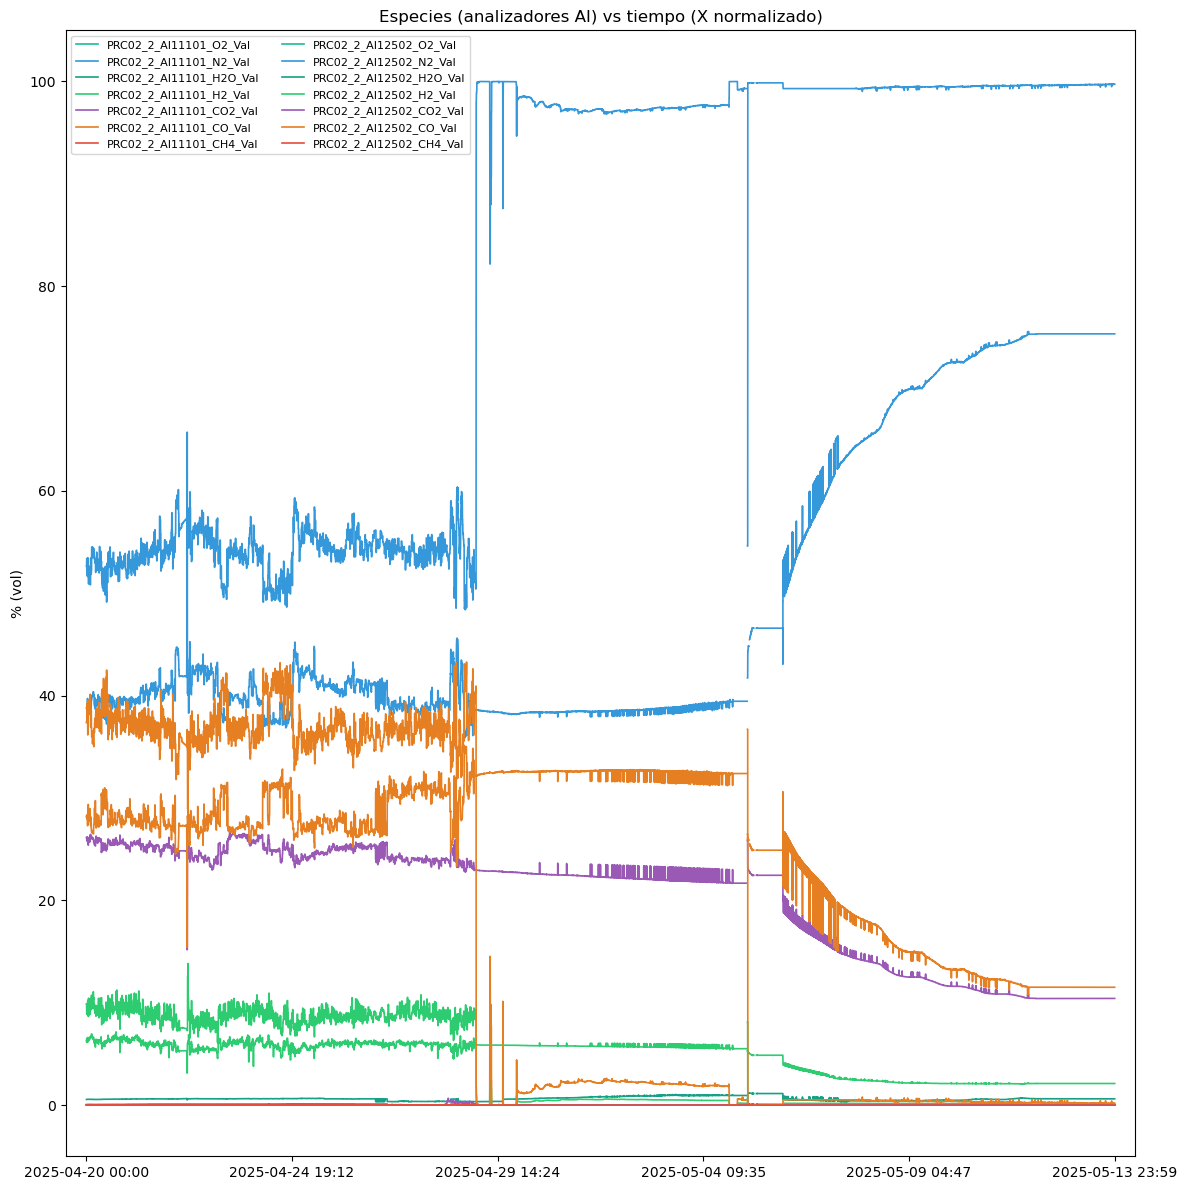

In [7]:
t0 = "2025-04-13 00:00:01"   
t1 = "2025-05-13 23:59:59"  

plot_raw_pressure(df, start=t0, end=t1)
plot_raw_flows(df, start=t0, end=t1)
plot_raw_temperature(df, start=t0, end=t1)
plot_raw_species(df, start=t0, end=t1)

 # Operation Time Step-SubStep-InOutLet

In [5]:
t0 = "2025-04-25 00:00:01"   
t1 = "2025-04-27 23:59:59"  
result = compute_cycle_times(df, start=t0, end=t1, anchor_bed="b1", decimals=2)
print("Ancla temporal:", result["anchor_time"])
result["summary_steps"]

Ancla temporal: 2025-04-25 00:09:10


bed  cycle_min  PRZ_min  FEED_min  BWD_min  PURGE_min  WAIT_min  cycle_count
0  b1      13.37     2.61      3.21     3.84       3.28      0.44          106
1  b2      13.37     2.62      3.20     3.84       3.28      0.44          106
2  b3      13.37     2.61      3.21     3.86       3.26      0.44          106
3  b4      13.37     2.61      3.21     3.84       3.29      0.43          106
4  b5      13.37     2.61      3.20     3.82       3.30      0.44          106
5  b6      13.37     2.59      3.22     3.83       3.30      0.43          106
6  b7      13.37     2.62      3.19     3.83       3.29      0.44          106
7  b8      13.37     2.60      3.22     3.87       3.25      0.44          106

In [6]:
result["summary_substeps"]

bed  PRZ_1_min  PRZ_2_min  PRZ_FEED_min  BWD_1_min  BWD_2_min  \
0  b1       0.78       0.49          1.33       0.44       1.20   
1  b2       0.79       0.45          1.36       0.45       1.18   
2  b3       0.76       0.49          1.35       0.44       1.17   
3  b4       0.78       0.47          1.35       0.44       1.14   
4  b5       0.75       0.51          1.34       0.44       1.17   
5  b6       0.73       0.53          1.32       0.45       1.19   
6  b7       0.77       0.50          1.35       0.44       1.17   
7  b8       0.77       0.47          1.34       0.44       1.14   

   BWD_PURGE_min  cycle_count  
0           2.21          106  
1           2.21          106  
2           2.25          106  
3           2.25          106  
4           2.21          106  
5           2.20          106  
6           2.23          106  
7           2.28          106

In [7]:
result["summary_inout"]

bed  INLET_min  OUT_min  cycle_count
0  b1       4.54     5.49          106
1  b2       4.57     5.49          106
2  b3       4.55     5.51          106
3  b4       4.56     5.54          106
4  b5       4.54     5.52          106
5  b6       4.54     5.50          106
6  b7       4.54     5.52          106
7  b8       4.56     5.54          106

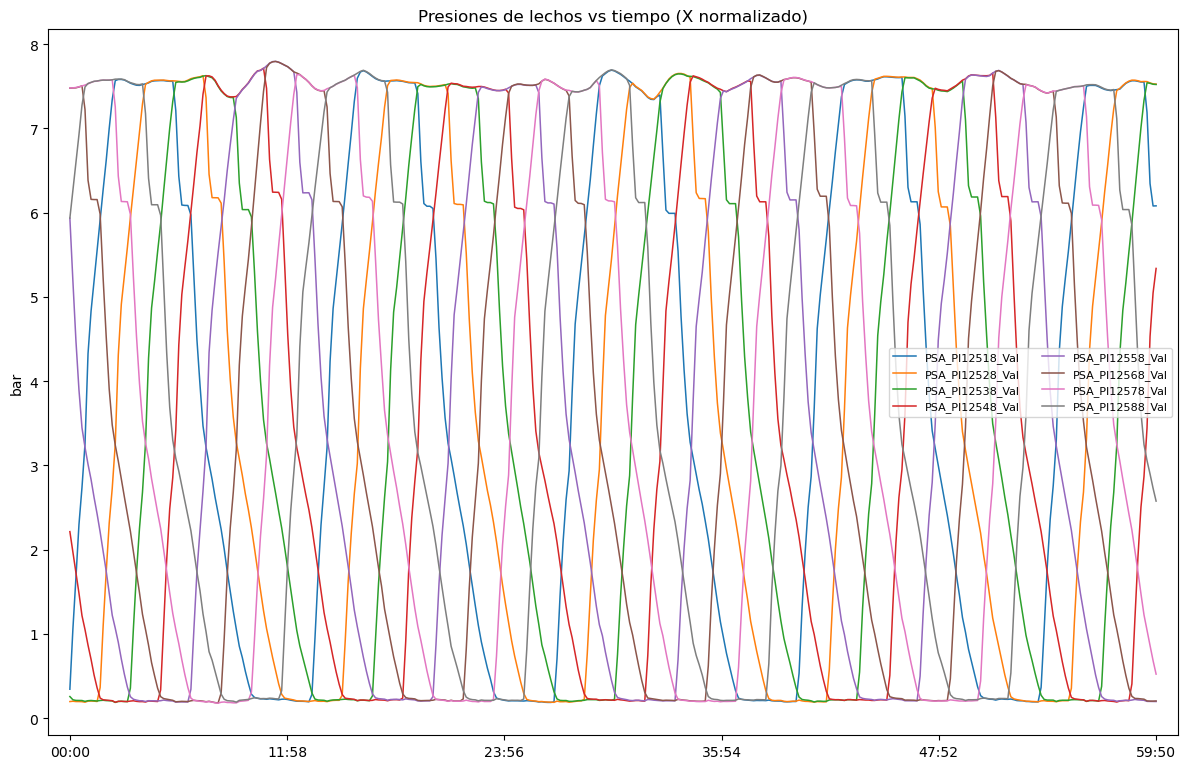

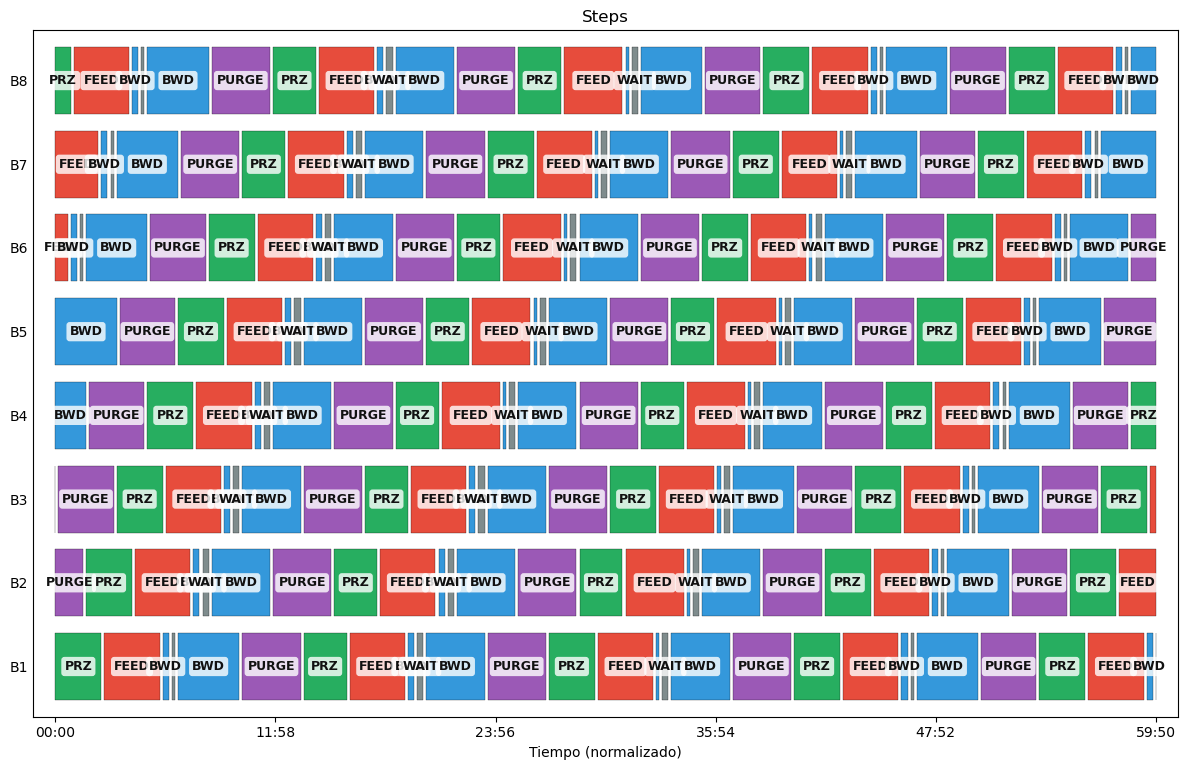

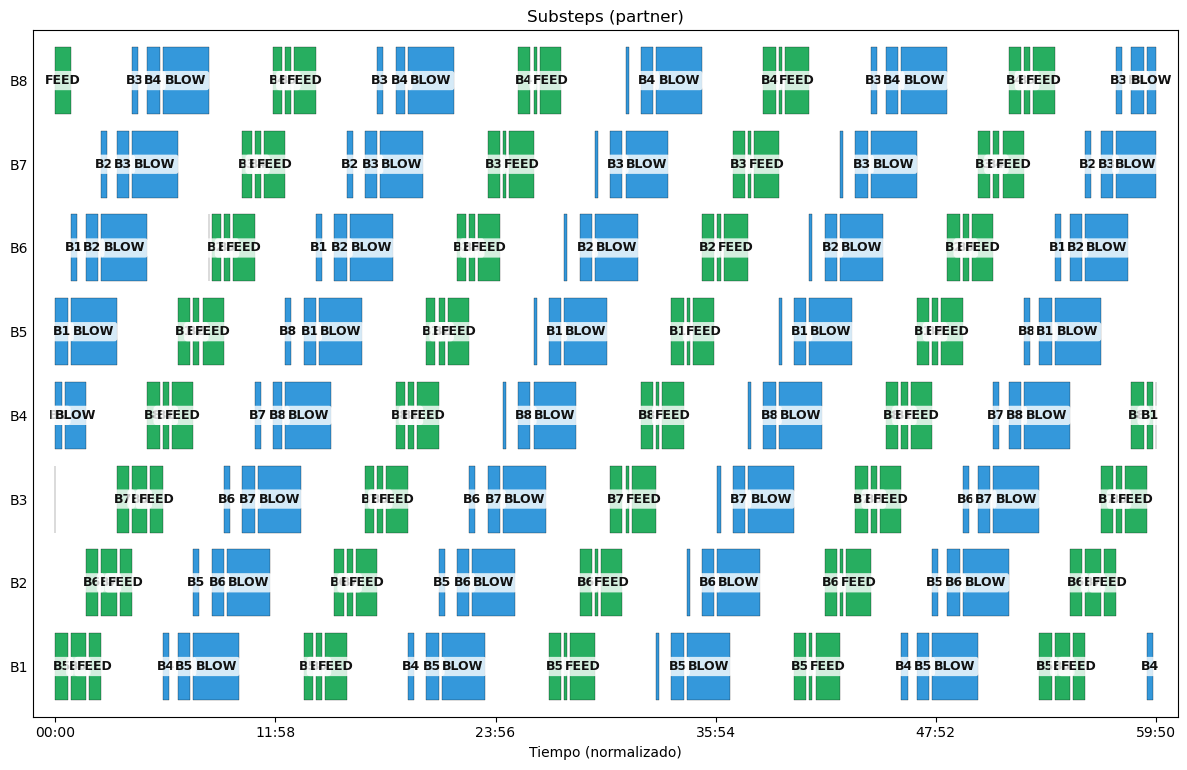

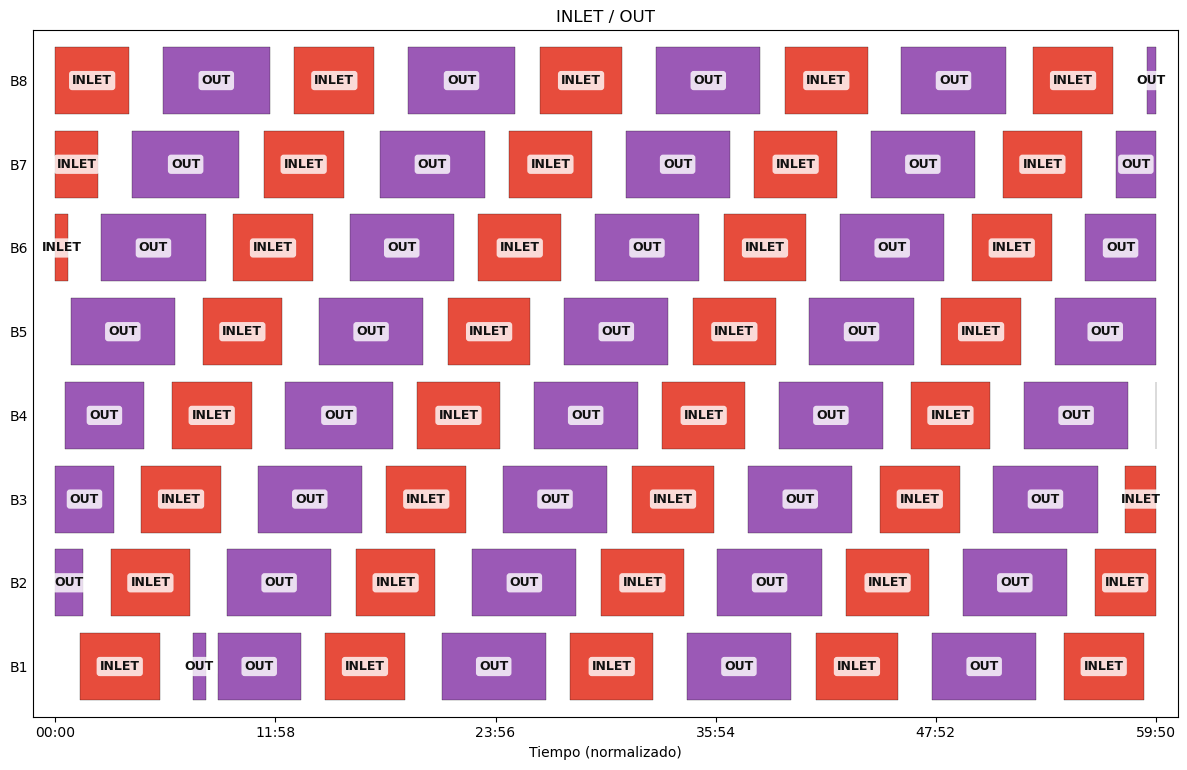

In [8]:
t0 = "2025-04-25 00:09:1"   
t1 = "2025-04-25 01:09:1"
plot_raw_pressure(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
plot_steps_gantt(df, start=t0, end=t1, mode="inout")

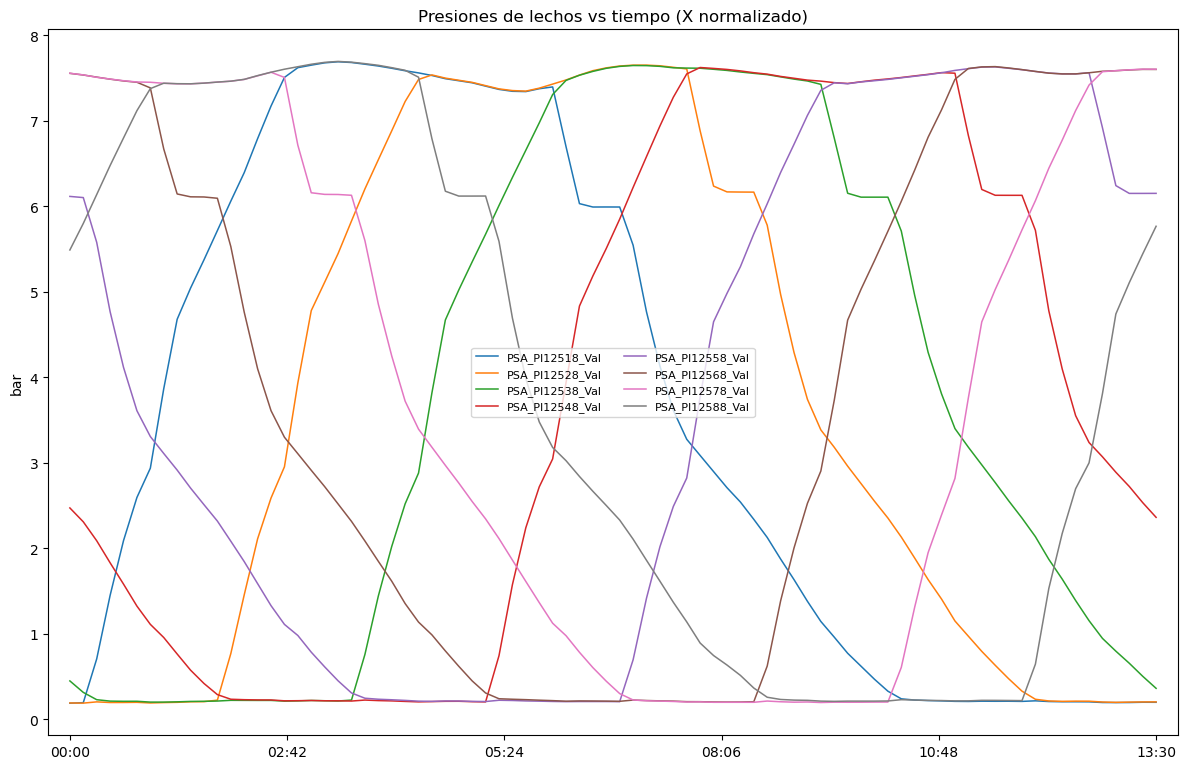

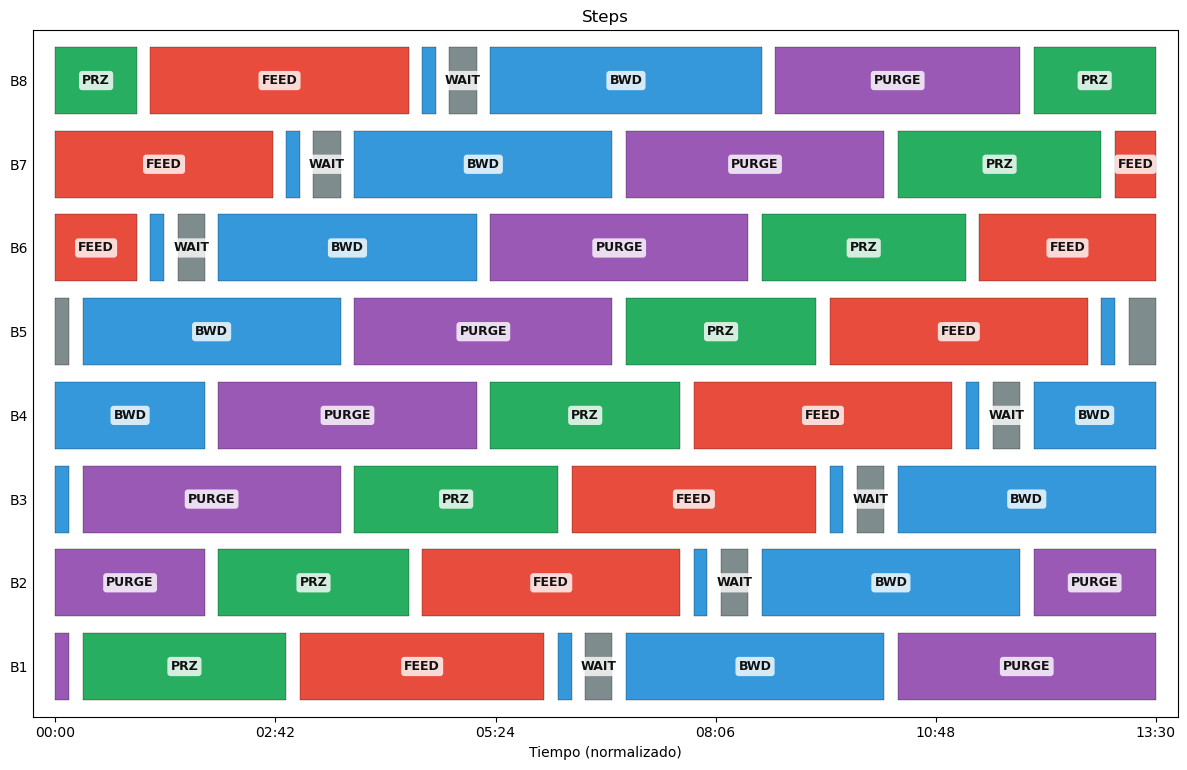

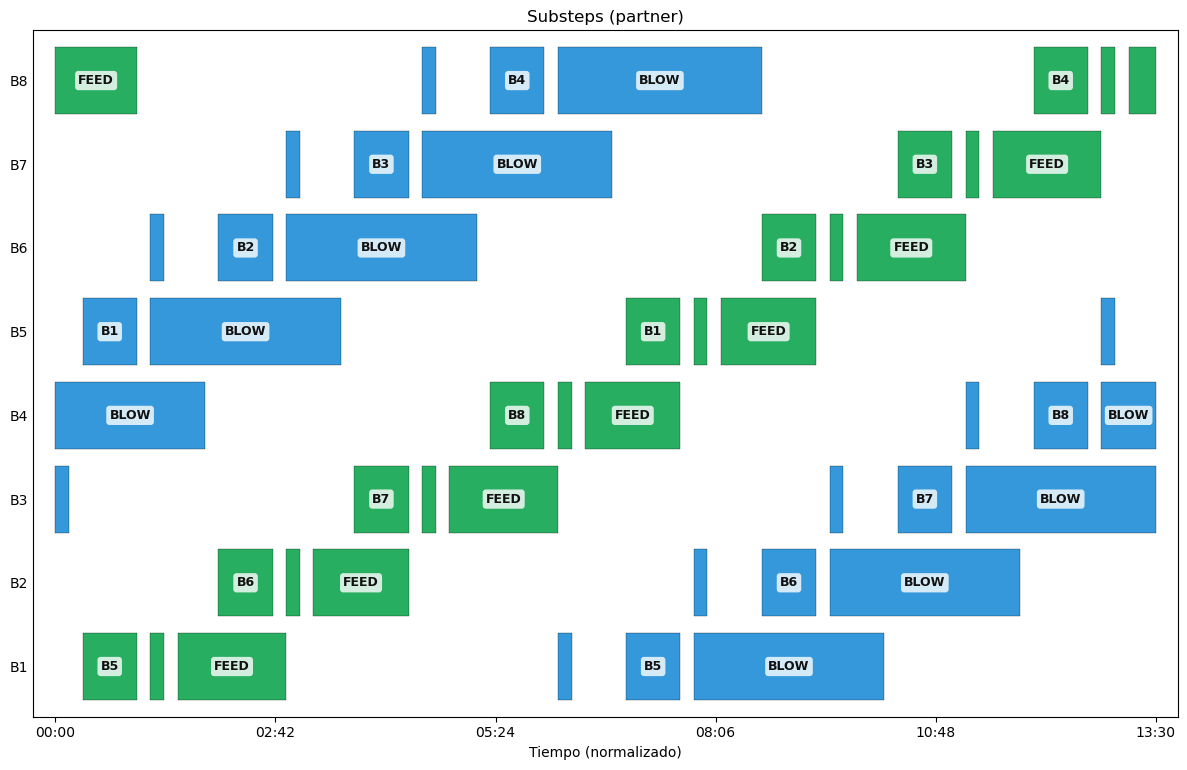

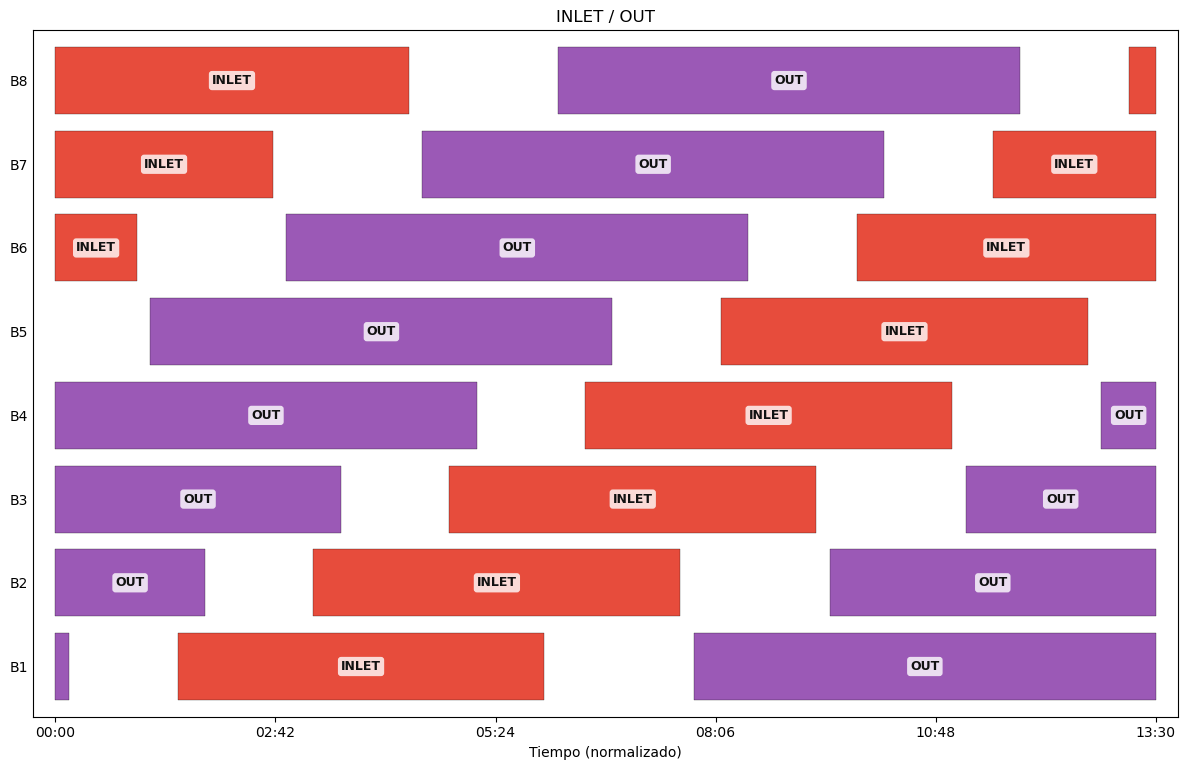

In [9]:
t0 = "2025-04-25 00:35:40"
t1 = "2025-04-25 00:49:18"
plot_raw_pressure(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
plot_steps_gantt(df, start=t0, end=t1, mode="inout")

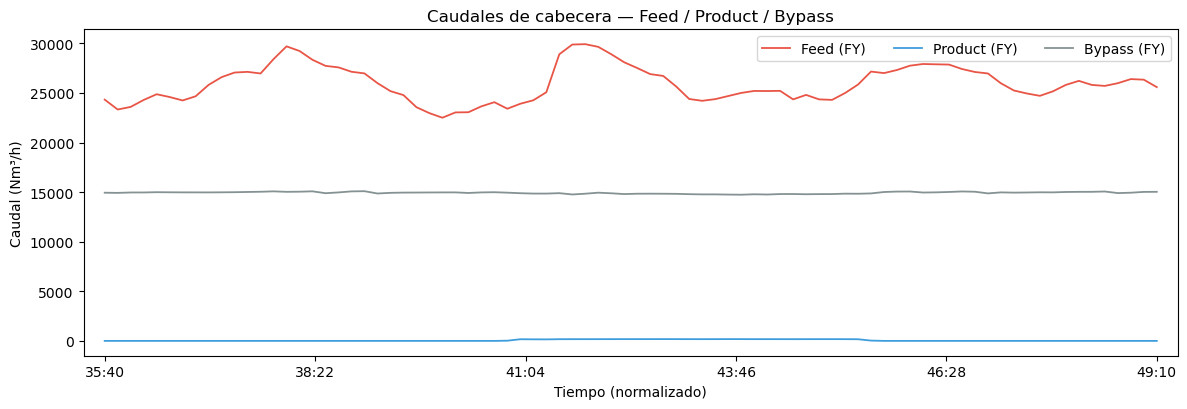

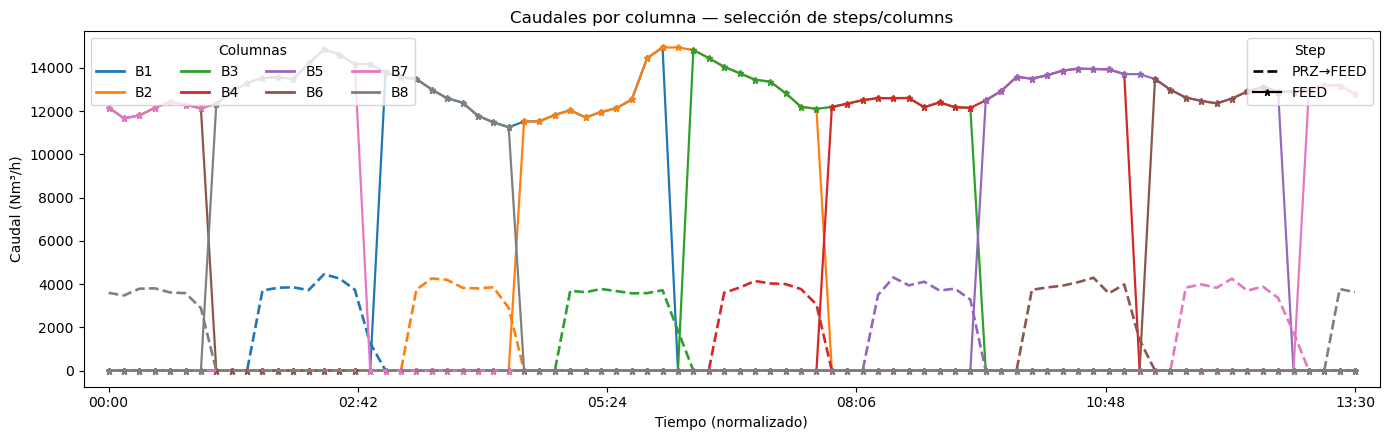

In [10]:
t0 = "2025-04-25 00:35:40"
t1 = "2025-04-25 00:49:18"
plot_raw_flows(df,t0,t1)
plot_flows(
    df, flows,
    start=t0, end=t1,
    beds="all",
    steps=["feed","prz-feed"],
    units="Nm3_h",
    figsize=(14, 4.5),    
)

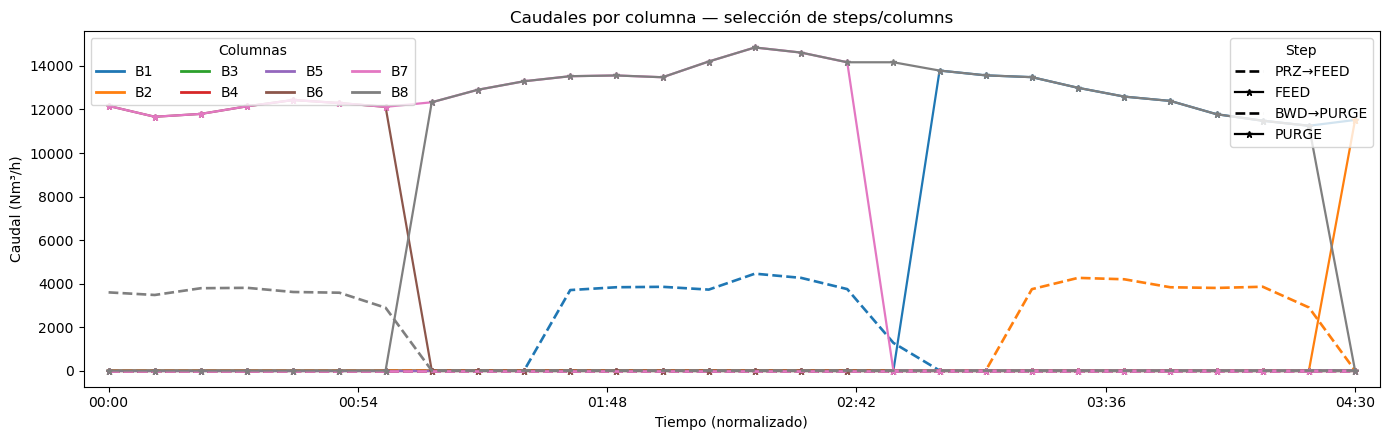

In [11]:
t0 = "2025-04-25 00:35:40"
t1 = "2025-04-25 00:40:18"
plot_flows(
    df, flows,
    start=t0, end=t1,
    beds="all",
    steps="all",
    units="Nm3_h",
    figsize=(14, 4.5)
)

# Turn OFF Operation

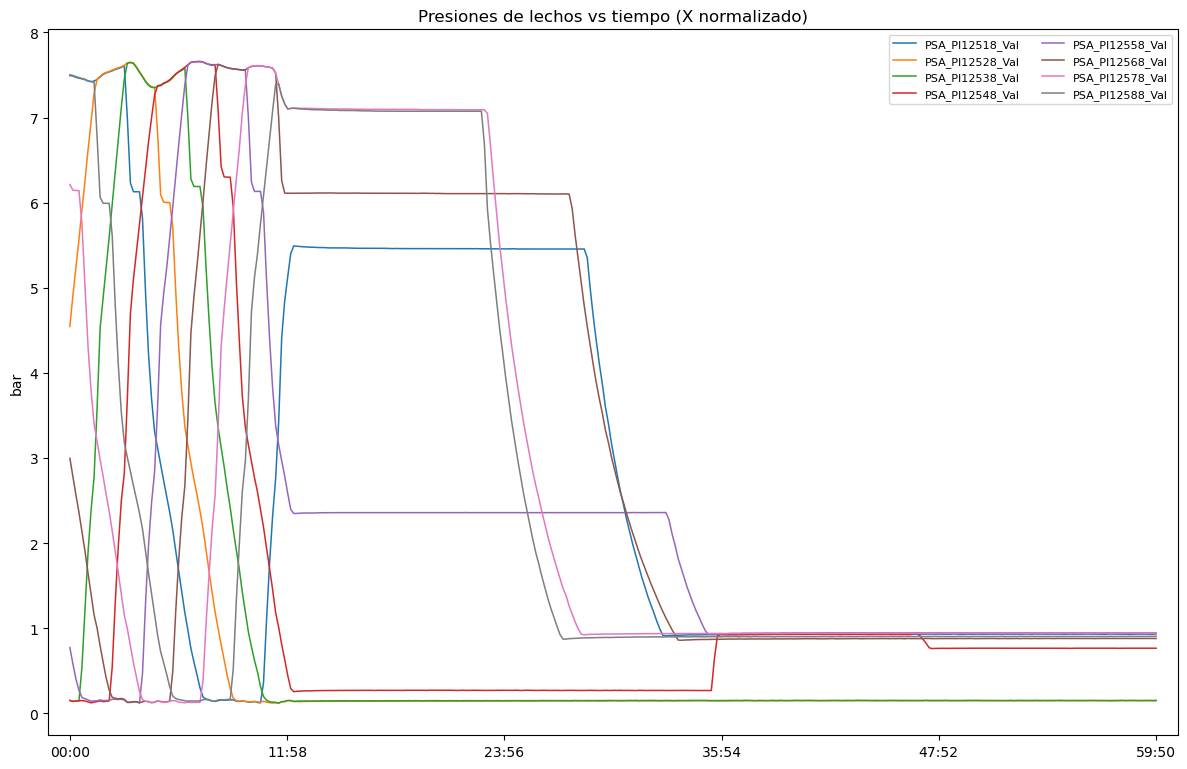

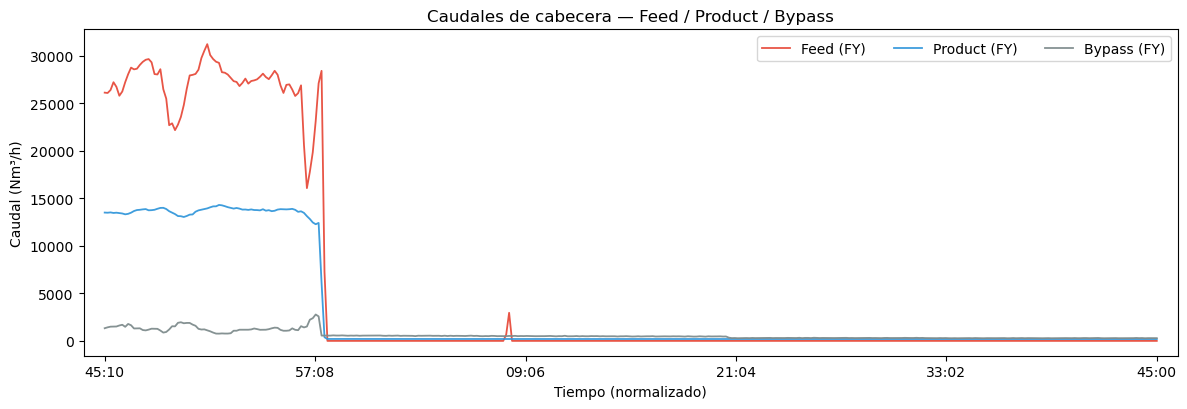

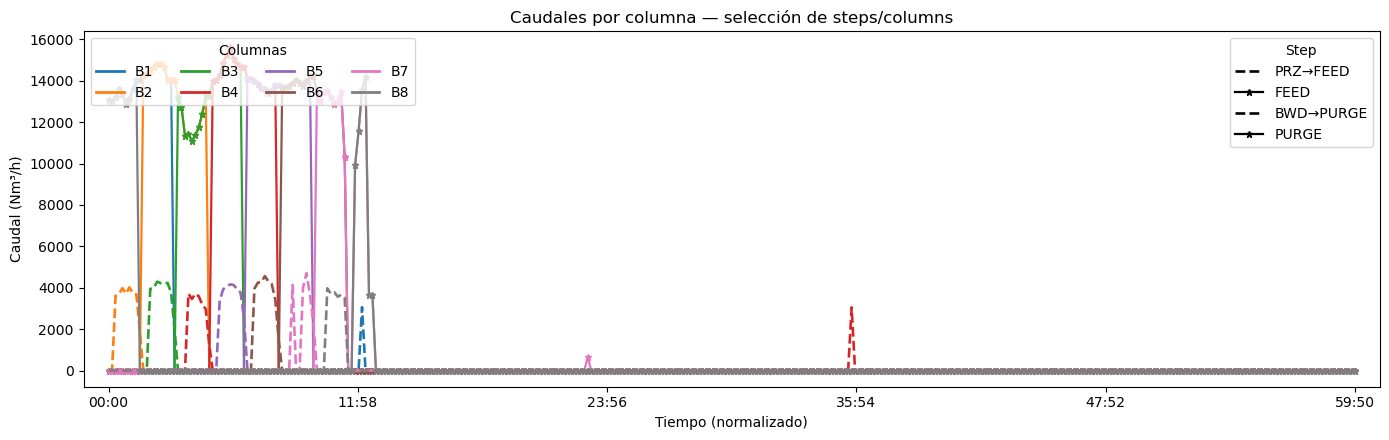

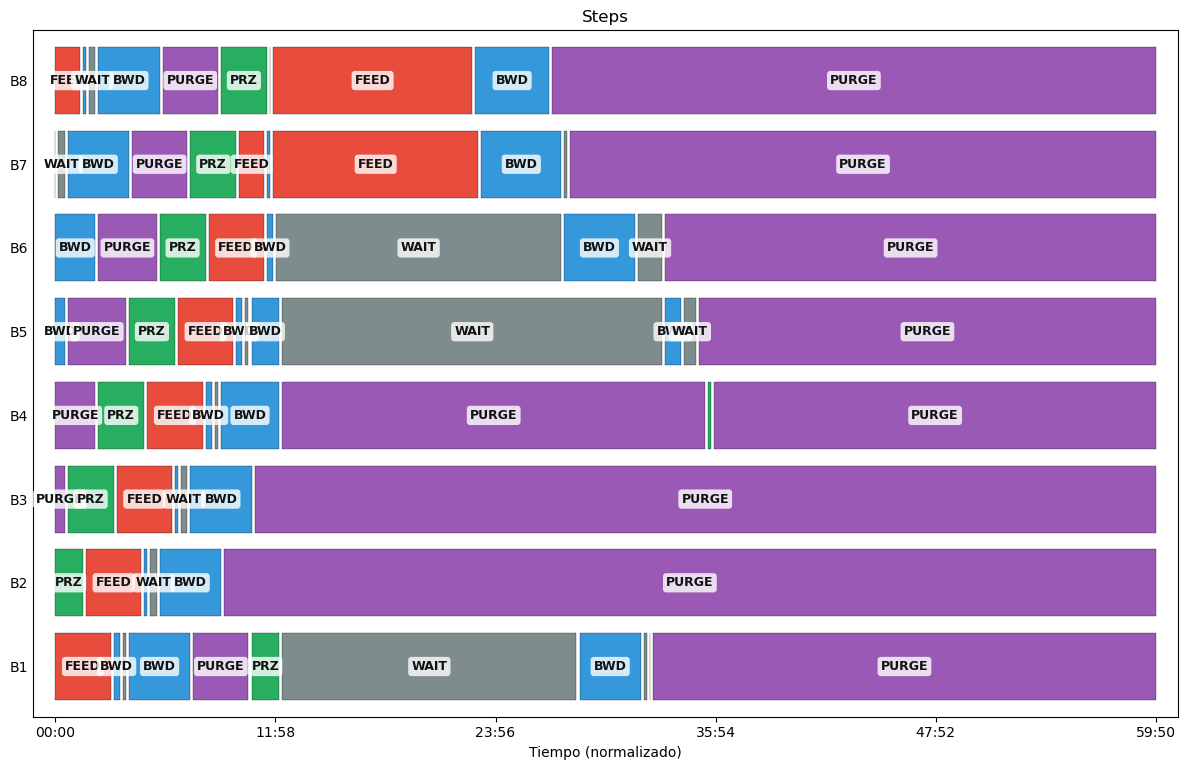

In [12]:
t0 = "2025-04-22 03:45:1"   
t1 = "2025-04-22 04:45:1"   
plot_raw_pressure(df, start=t0, end=t1)
plot_raw_flows(df, start=t0, end=t1)
plot_flows(
    df, flows,
    start=t0, end=t1,
    beds="all",
    steps="all",
    units="Nm3_h",
    figsize=(14, 4.5)
)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")

# Wait OPERATION

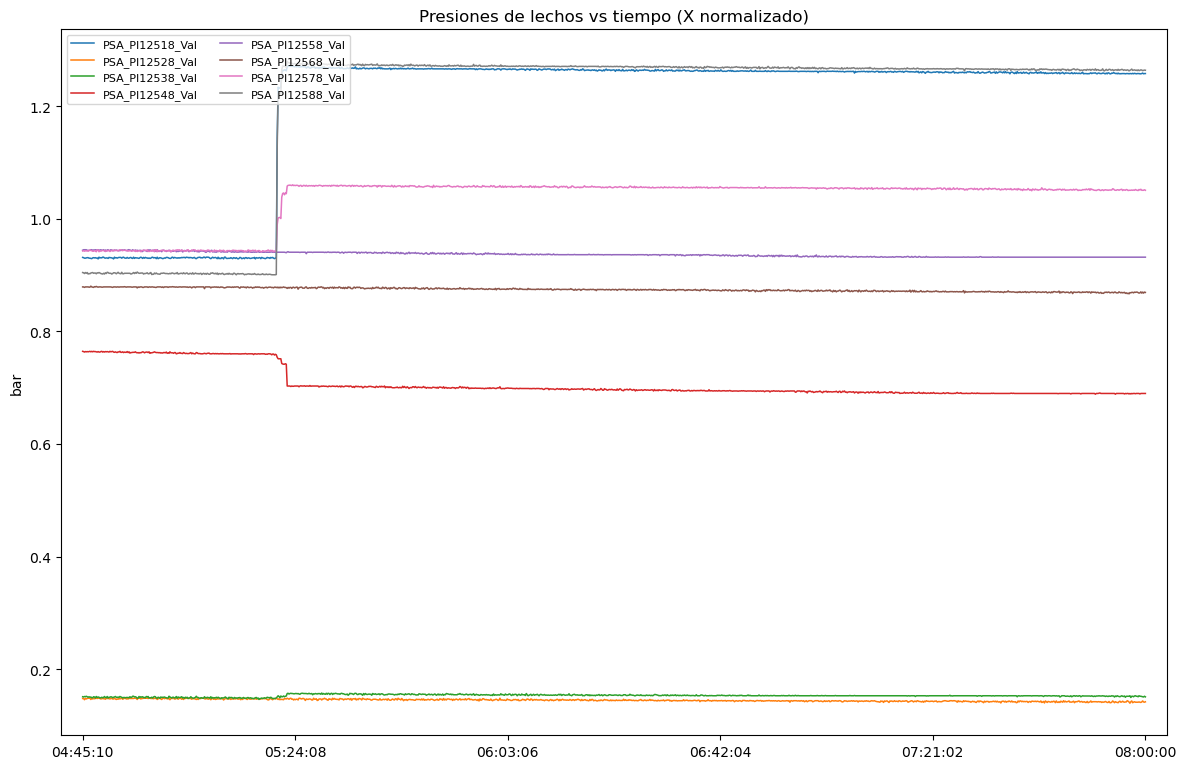

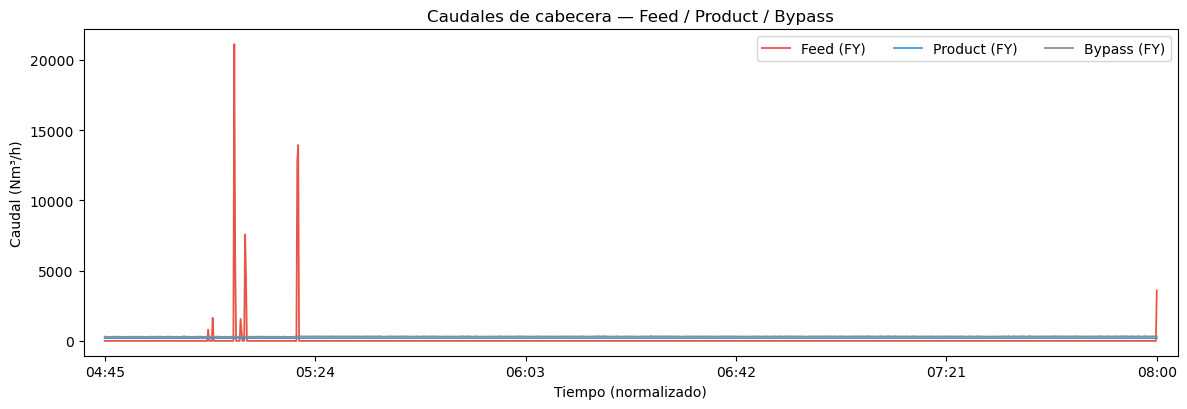

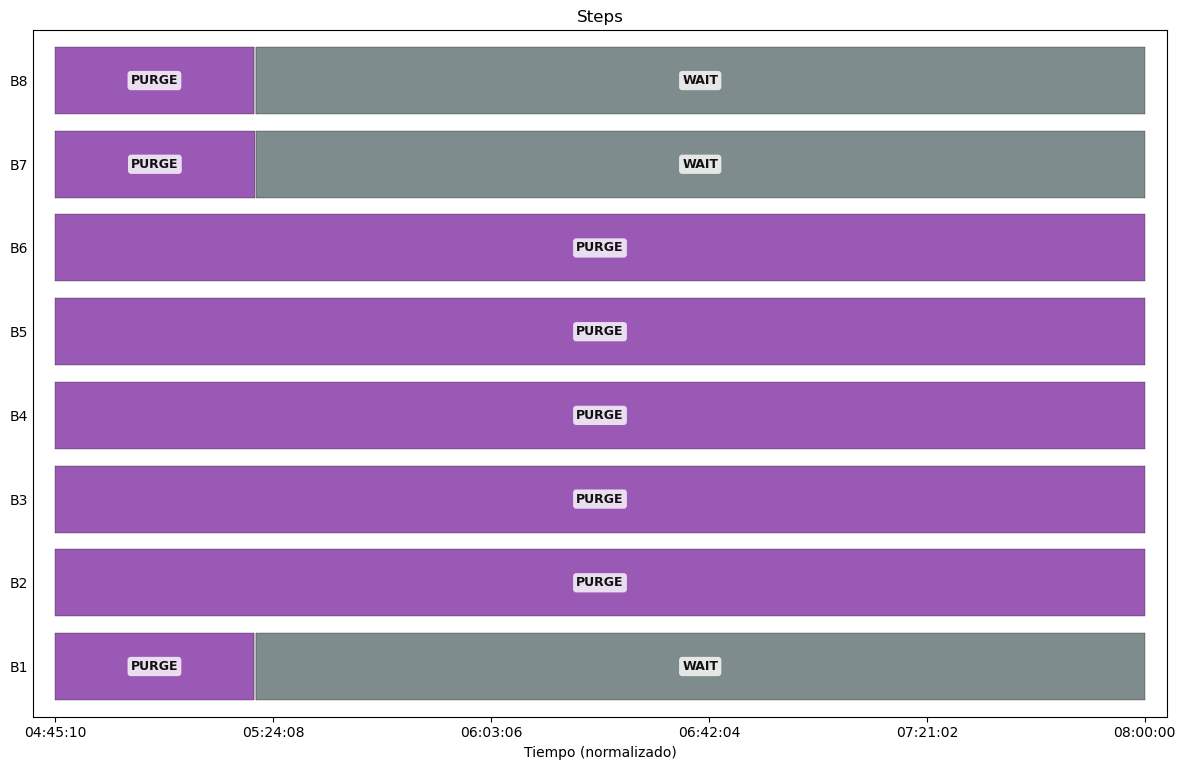

In [13]:
t0 = "2025-04-22 04:45:1" 
t1 = "2025-04-22 08:00:1"
plot_raw_pressure(df, start=t0, end=t1)
plot_raw_flows(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")

# Start Up Operation

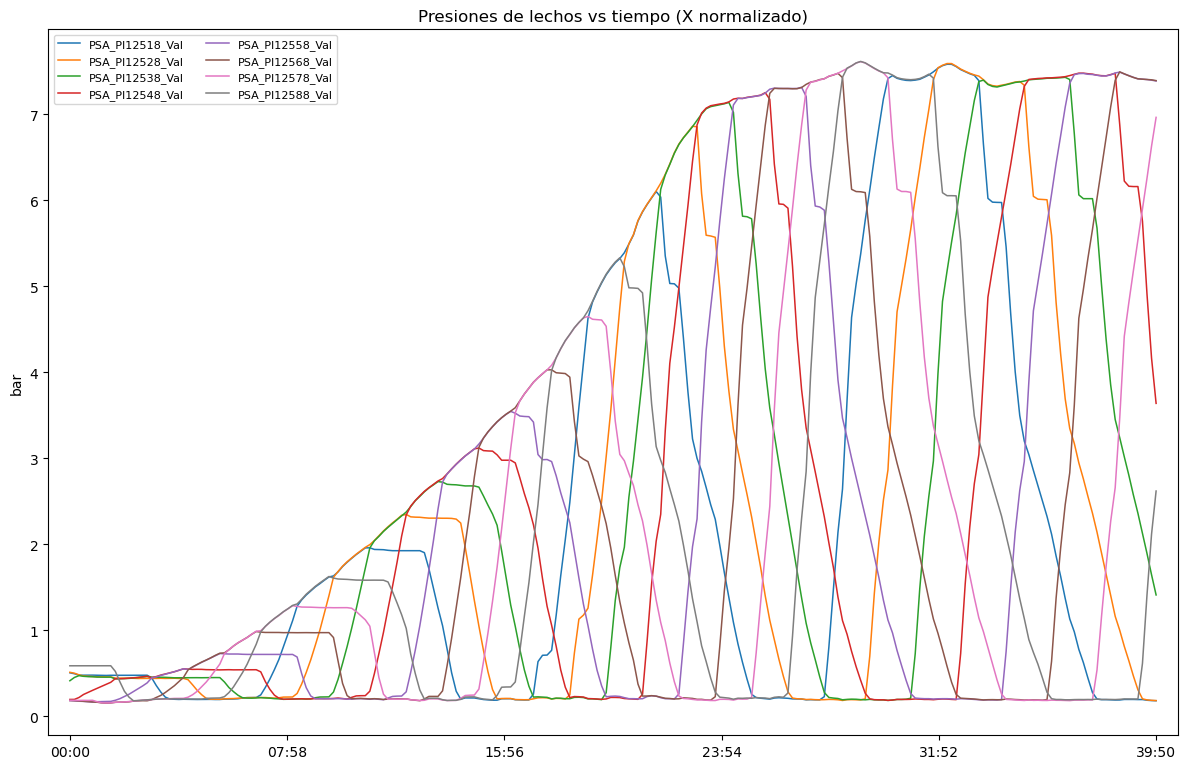

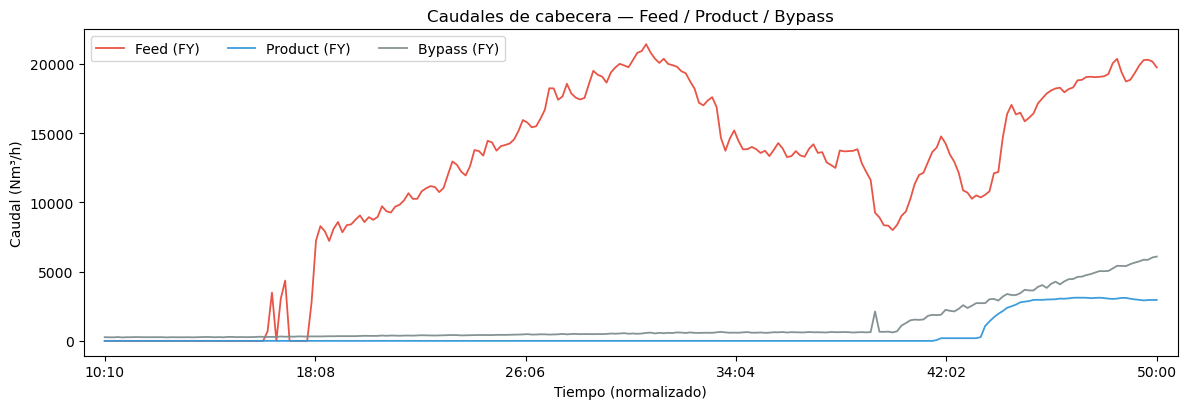

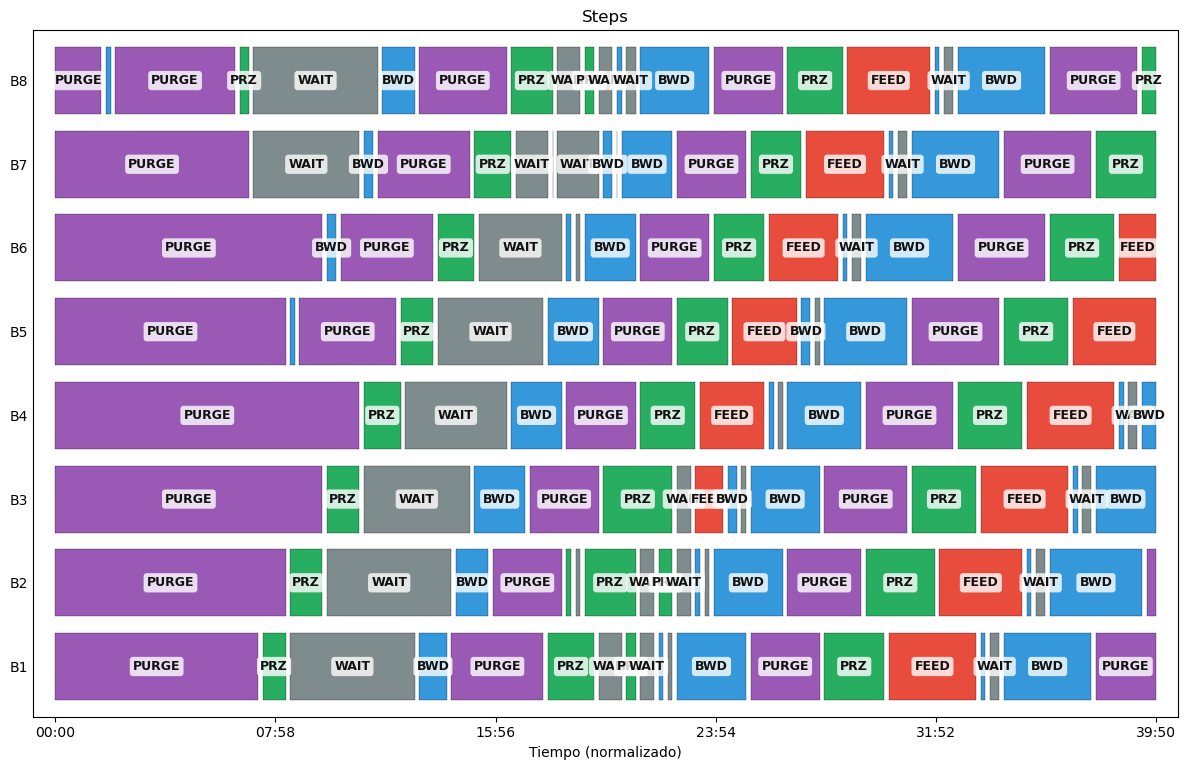

In [14]:
t0 = "2025-04-22 08:10:1"
t1 = "2025-04-22 08:50:1"
plot_raw_pressure(df, start=t0, end=t1)
plot_raw_flows(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")